<Center><h1>Computational reproduction, optimisation and discussion of the ATLAS Experiment analysis on the production of ZZ in proton-proton collisions at √s = 13 TeV using Open Data</h1></Center>

Queremos ver si nuestro modelo es capaz de describir unos datos dados.

In [1]:
//%jsroot on

In [2]:
#include "TH1.h"
#include "TH1D.h"
#include "TF1.h"
#include "TGraph.h"
#include "TGraphQQ.h"
#include "TCanvas.h"
#include "TStyle.h"
#include "TMath.h"

In [3]:
TFile *dataset = new TFile("/eos/user/t/tester1/SWAN_projects/MILDRED/ZZDiBoson/Analysis/Output_ZZDiBosonAnalysis/data.root");

In [4]:
gStyle->SetOptFit(1112);//información sobre los parámetros de ajuste impresos en el cuadro de estadísticas del histograma 
gStyle->SetOptStat("en");//e:número de entradas impresas(Entries),m:valor medio impreso(Mean),r:rms impreso(Std Dev),n:se imprime el nombre del histograma

In [5]:
TH1F *m_four_lep=(TH1F*)dataset->Get("hist_fourlepsys_m");
m_four_lep->ClearUnderflowAndOverflow();
//TH1::StatOverflows(kTRUE); 
m_four_lep->Print(); // Lectura de datos

TH1.Print Name  = hist_fourlepsys_m, Entries= 96, Total sum= 90


In [6]:
TCanvas *c1 = new TCanvas("c1","c1",10,10,700,600);

In [7]:
m_four_lep->Draw("");

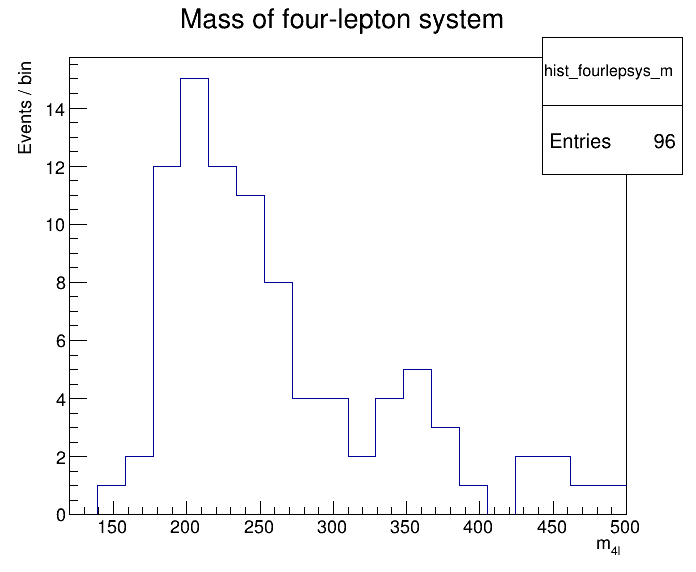

In [8]:
c1->Draw();

In [9]:
TCanvas *c2 = new TCanvas("c2","c2",10,10,700,600);

In [10]:
TF1 *fit1=new TF1("fit1","[0]*TMath::Landau(x,[1],[2])",120,500);//defini la función a estudiar
fit1->SetParameters(m_four_lep->GetMaximum(),m_four_lep->GetMean(),m_four_lep->GetRMS());//parametros iniciales
fit1->SetParNames("const","MPV","RMS");  
m_four_lep->Fit("fit1","","",120,500);
m_four_lep->Draw("E1");

/*TF1 *fit1=new TF1("fit1","landau",120,500);
fit1->SetParameters(m_four_lep->GetMaximum(), m_four_lep->GetMean(),m_four_lep->GetRMS());
m_four_lep->Fit("landau", " "," ",120,500);
m_four_lep->Draw("E1");*/

 FCN=7.64445 FROM MIGRAD    STATUS=CONVERGED     139 CALLS         140 TOTAL
                     EDM=4.59941e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  const        8.15110e+01   1.46401e+01   1.28902e-02  -9.78135e-05
   2  MPV          2.13000e+02   5.55990e+00   5.14374e-03  -4.87319e-05
   3  RMS          2.12714e+01   3.43969e+00   2.43586e-03  -3.65989e-04


El algoritmo de minimizacion utilizado es MIGRAD

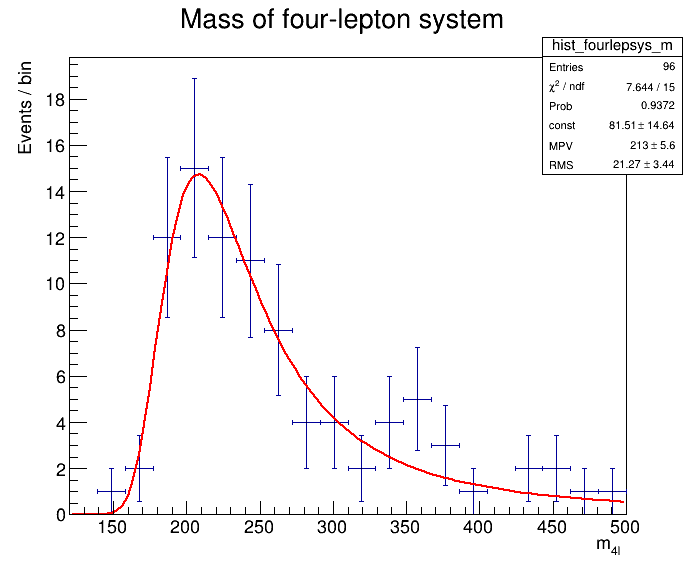

In [11]:
c2->Draw();

Este es el valor el del modelo que se obtiene cuando se han minimizado los parametros.

Con FCN= chi2= 7.64445

* Cuyos Párametros son:

In [12]:
cout << "Valor mas Probable(MPV)= " <<fit1->GetParameter(1) << " +/- " << fit1->GetParError(1) << endl;
cout << "Anchura(sigma)= " <<fit1->GetParameter(2) << " +/- " << fit1->GetParError(2) << endl;

Valor mas Probable(MPV)= 213 +/- 5.5599
Anchura(sigma)= 21.2714 +/- 3.43969


In [13]:
cout << "Nivel de Confianza= " <<TMath::Prob(7.64445,15)<< endl;

Nivel de Confianza= 0.937245


Veamos que es lo que hace MINUIT.

*MINUIT, es una biblioteca de software de minimización numérica escrita originalmente en el lenguaje de programación FORTRAN, por el físico del CERN Fred James en la década de 1970. Proporciona varios algoritmos de minimización que buscan valores de parámetros que minimizan una función definida por el usuario. Además de eso, puede calcular intervalos de confianza para los parámetros escaneando la función alrededor del mínimo. MINUIT está implementado en ROOT, en la clase TMinuit.*

##### Experimento: Como hace la maquina para calcular el minimo de Chi2 por ejemplo.

Se fija parametros al azar, va calculando valores de Chi2 y luego va buscando el minimo 

##### Quiero ver la curva de Chi2
Para eso hago un Fit otra vez pero le voy a pedir que el parametro MPV lo fije. Es decir que calcule el Chi2 si el MPV este en 205 ó 206 y asi sucesivamente. Es evidente que cuanto mas me acerque al valor real del modelo de los datos el chi2 va ser mas pequeño 

In [14]:
double mpvMin=200, mpvMax=220;
double rmsMin=5,   rmsMax=30;
double stepMPV = (mpvMax-mpvMin)/100.  ;
double stepRms =   (rmsMax-rmsMin)/100. ;

TH1D * histo = new TH1D("histo" , "histo" , 20 , 120 , 500 ) ;
TH1D * theMap = new TH1D("theMap", "theMap;MPV;Chi2", 100, mpvMin, mpvMax);


for (double i= mpvMin; i< mpvMax ; i+= stepMPV){
    fit1 -> FixParameter(1,i);
    fit1 -> SetParameters(70,i,20);//1000
    //histo->Reset(); 
    //histo->FillRandom("fit1" , nEvents);
    m_four_lep-> Fit("fit1"," "," ",110,600);
    cout<<fit1->GetChisquare ()<< endl;
    theMap->SetBinContent(theMap->FindBin(i),fit1->GetChisquare());
}

/*
   TFitResultPtr r ; 
  for( double i = meanMin ; i < meanMax ; i += stepMean ){
    fit1->FixParameter(1,i) ; 
      fit1->SetParameters(70,i,20);
      r = m_four_lep->Fit("fit1",  "LQS", "",110,600);
      theMap->SetBinContent(theMap->FindBin(i),r->SetFCN());
}*/

 FCN=15.1297 FROM MIGRAD    STATUS=CONVERGED      51 CALLS          52 TOTAL
                     EDM=6.03698e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  const        9.86519e+01   1.38868e+01   2.23560e-02  -2.87157e-05
   2  MPV          2.00000e+02     fixed    
   3  RMS          1.54477e+01   1.32585e+00   2.13590e-03  -2.59496e-04
15.1297
 FCN=14.873 FROM MIGRAD    STATUS=CONVERGED      53 CALLS          54 TOTAL
                     EDM=1.71327e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  const        9.84864e+01   1.38533e+01   2.21099e-02   5.15053e-05
   2  MPV          2.00200e+02     fixed    
   3  RMS          1.55345e+01   1.33633e+00   2.13782e-03   3.15460e-04
14.873
 F

Es evidente que cuanto mas me acerque al valor real del modelo de los datos el chi2 va ser mas pequeño

In [15]:
theMap->Draw();

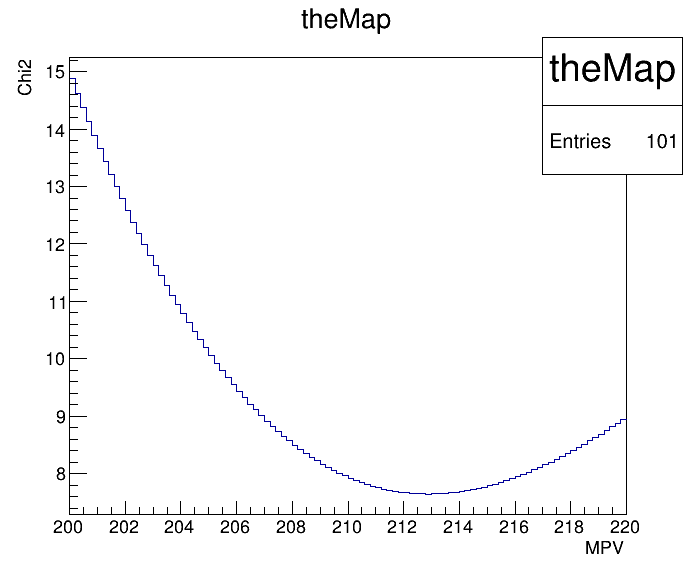

In [16]:
c2->Draw();

La forma de Chi2 en funcion de MPV sigue un perfil parabólico, y el mínimo coincide con el valor de MPV el cual es 213. El error viene dado por una unidad de chi2 hacia arriba.

In [17]:
double minimo= 14.856/(2*0.0348635)

(double) 213.05950


Hago una interpolacion parabolica en el minimo y veo cual seria el error al hacer un fit y hacer una diferencia en el eje vertical de un Chi2  

In [18]:
theMap->Fit("pol2"," "," ",207,217);


****************************************
Minimizer is Linear / Migrad
Chi2                      =   0.00178205
NDf                       =           47
p0                        =      1590.24   +/-   2432.39     
p1                        =      -14.856   +/-   22.9465     
p2                        =    0.0348635   +/-   0.05411     


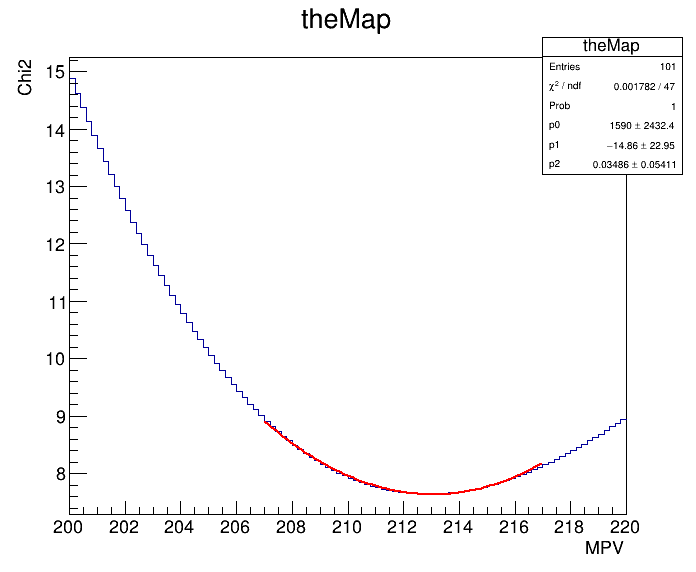

In [19]:
c2->Draw();

El intervalo en x vale 5.5 cuando el chi2 varia en una unidad que corresponde aproximadamente con el error del parámetro MPV en el fit principal (el minimo esta en 213.05) y el intervalo en x cuando el chi2 varia en una unidad se encuentra aproximadamente a ojo en 207.5.

Para aumentar el chi2 en una unidad me tuve que desplazar 6 unidades en MPV. 
nivel de confianza igual a valor p:

El problema con el test de chi2 con estadística limitada o bines vacíos es doble: 
- El valor p probablemente no sea correcto
- Es posible que no estemos en la aproximación parabólica (en el mínimo del chi2) y los errores no estén bien calculados
Una forma de demostrarlo es: genero un toy con poca estadística con una función sencilla (una gaussiana por ejemplo), dibujo su curva de chi2 en función de uno de sus parámetros y observo si es una parábola